# Used Car Price Prediction (XGBoost)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("cars_data.csv")

In [3]:
df.head()

Make           Model   Type Origin DriveTrain     MSRP  EngineSize  \
0  Acura             MDX    SUV   Asia        All  $36,945         3.5   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  $23,820         2.0   
2  Acura         TSX 4dr  Sedan   Asia      Front  $26,990         2.4   
3  Acura          TL 4dr  Sedan   Asia      Front  $33,195         3.2   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  $43,755         3.5   

   Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length  
0        6.0         265        17           23    4451        106     189  
1        4.0         200        24           31    2778        101     172  
2        4.0         200        22           29    3230        105     183  
3        6.0         270        20           28    3575        108     186  
4        6.0         225        18           24    3880        115     197

In [4]:
df.tail()

Make                    Model   Type  Origin DriveTrain     MSRP  \
423  Volvo  C70 LPT convertible 2dr  Sedan  Europe      Front  $40,565   
424  Volvo  C70 HPT convertible 2dr  Sedan  Europe      Front  $42,565   
425  Volvo               S80 T6 4dr  Sedan  Europe      Front  $45,210   
426  Volvo                      V40  Wagon  Europe      Front  $26,135   
427  Volvo                     XC70  Wagon  Europe        All  $35,145   

     EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
423         2.4        5.0         197        21           28    3450   
424         2.3        5.0         242        20           26    3450   
425         2.9        6.0         268        19           26    3653   
426         1.9        4.0         170        22           29    2822   
427         2.5        5.0         208        20           27    3823   

     Wheelbase  Length  
423        105     186  
424        105     186  
425        110     190  
426        101     180  
427        109     186

In [8]:
df.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [7]:
df = df.dropna()

In [10]:
df.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP            object
EngineSize     float64
Cylinders      float64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

In [9]:
df["MSRP"].head(2)

0    $36,945
1    $23,820
Name: MSRP, dtype: object

In [11]:
df["MSRP"] = df["MSRP"].str.replace("$", "")
df["MSRP"] = df["MSRP"].str.replace(",", "")
df["MSRP"] = df["MSRP"].astype("int")


In [12]:
df["MSRP"].head(2)

0    36945
1    23820
Name: MSRP, dtype: int32

In [13]:
df.shape

(426, 14)

In [14]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 

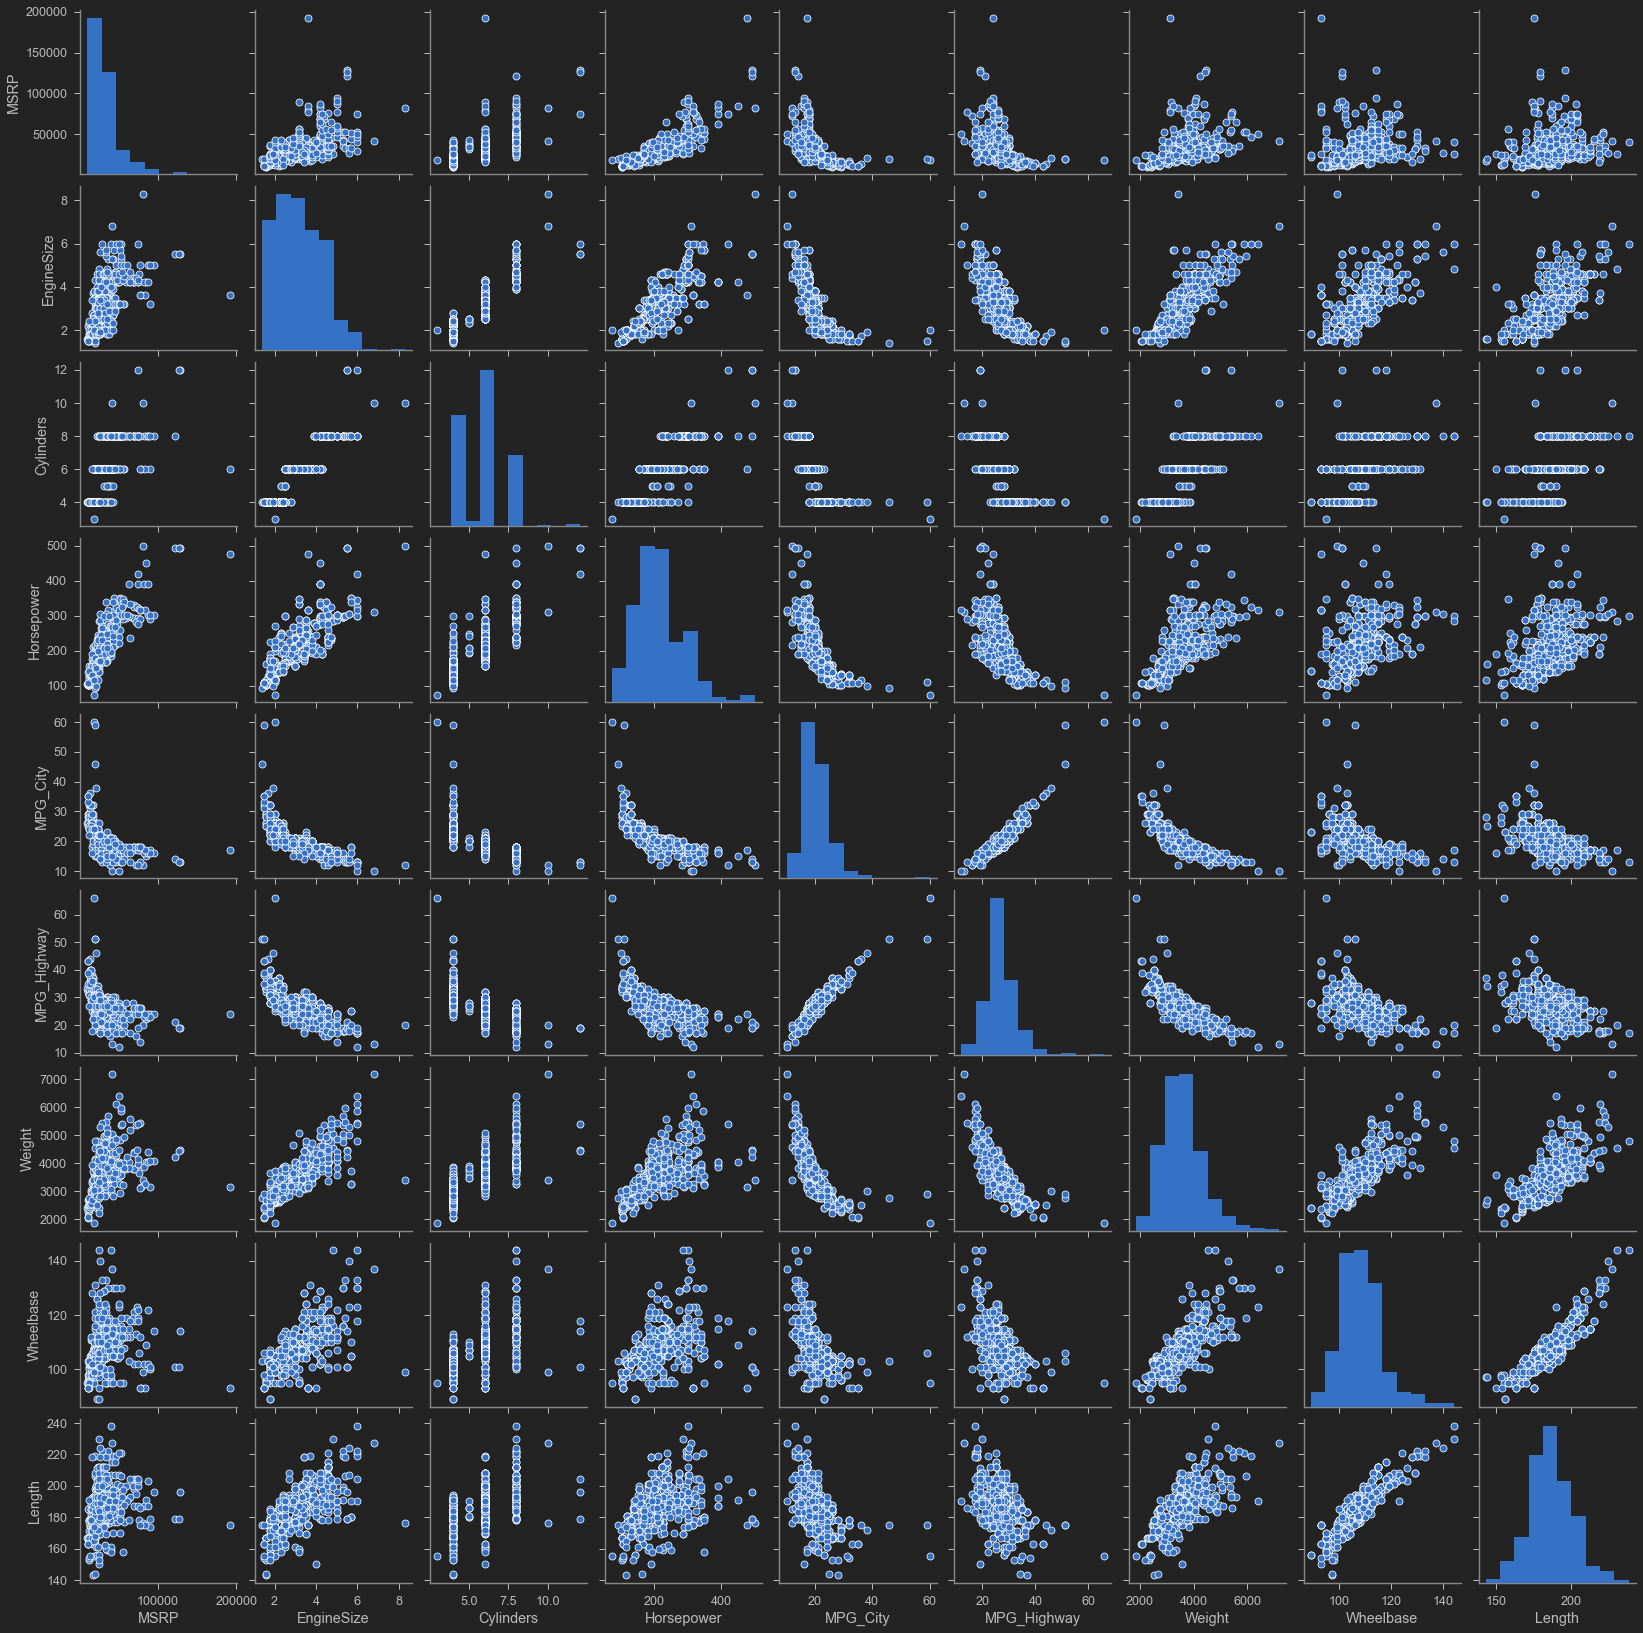

In [15]:
sns.pairplot(df)

In [16]:
df.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'EngineSize',
       'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight',
       'Wheelbase', 'Length'],
      dtype='object')

In [17]:
df.Make.unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hummer', 'Hyundai',
       'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover',
       'Lexus', 'Lincoln', 'MINI', 'Mazda', 'Mercedes-Benz', 'Mercury',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Pontiac', 'Porsche', 'Saab',
       'Saturn', 'Scion', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [14]:
fig = px.histogram(df, x="Make",
                  labels = {"Make": "Manufacturer"},
                  title= "Manufacturer of the car",
                  color_discrete_sequence=["red"])

fig.show()

In [13]:
fig = px.histogram(df, x="Origin",
                  labels = {"Origin": "Origin of car"},
                  title= "Origin of the car",
                  color_discrete_sequence=["blue"])

fig.show()

In [21]:
df.corr()

MSRP  EngineSize  Cylinders  Horsepower  MPG_City  \
MSRP         1.000000    0.573238   0.649742    0.827296 -0.475916   
EngineSize   0.573238    1.000000   0.908002    0.793250 -0.717860   
Cylinders    0.649742    0.908002   1.000000    0.810341 -0.684402   
Horsepower   0.827296    0.793250   0.810341    1.000000 -0.677034   
MPG_City    -0.475916   -0.717860  -0.684402   -0.677034  1.000000   
MPG_Highway -0.440523   -0.725901  -0.676100   -0.647425  0.940993   
Weight       0.447987    0.808707   0.742209    0.631758 -0.740418   
Wheelbase    0.151665    0.638947   0.546730    0.387561 -0.508029   
Length       0.171060    0.636015   0.547783    0.382386 -0.504184   

             MPG_Highway    Weight  Wheelbase    Length  
MSRP           -0.440523  0.447987   0.151665  0.171060  
EngineSize     -0.725901  0.808707   0.638947  0.636015  
Cylinders      -0.676100  0.742209   0.546730  0.547783  
Horsepower     -0.647425  0.631758   0.387561  0.382386  
MPG_City        0.940993 -0.740418  -0.508029 -0.504184  
MPG_Highway     1.000000 -0.793615  -0.525457 -0.468756  
Weight         -0.793615  1.000000   0.760857  0.689168  
Wheelbase      -0.525457  0.760857   1.000000  0.889838  
Length         -0.468756  0.689168   0.889838  1.000000

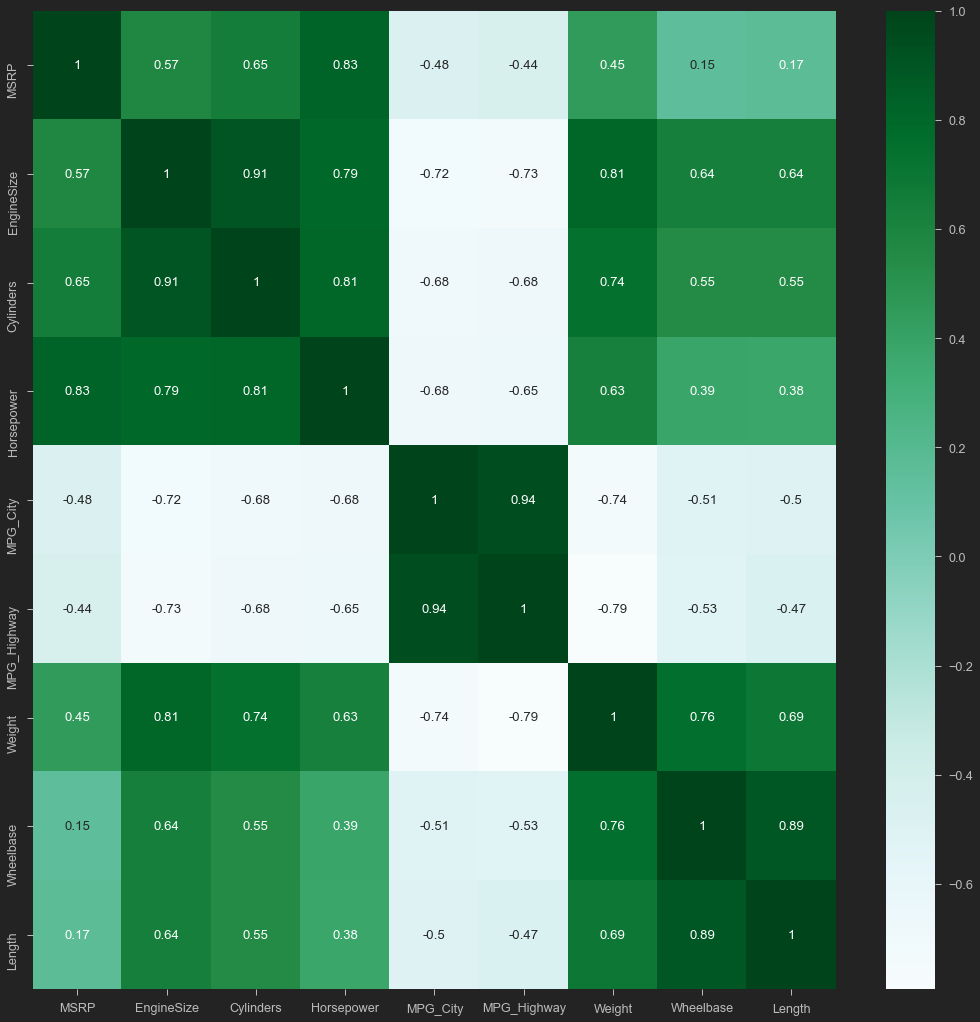

In [23]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), cmap= "BuGn", annot=True)

In [24]:
df.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP             int32
EngineSize     float64
Cylinders      float64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

In [25]:
df.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'EngineSize',
       'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight',
       'Wheelbase', 'Length'],
      dtype='object')

In [26]:
df_new = pd.get_dummies(df, columns= ['Make', 'Model', 'Type', 'Origin', 'DriveTrain'])

In [29]:
df_new.head()

MSRP  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
0  36945         3.5        6.0         265        17           23    4451   
1  23820         2.0        4.0         200        24           31    2778   
2  26990         2.4        4.0         200        22           29    3230   
3  33195         3.2        6.0         270        20           28    3575   
4  43755         3.5        6.0         225        18           24    3880   

   Wheelbase  Length  Make_Acura  ...  Type_Sedan  Type_Sports  Type_Truck  \
0        106     189           1  ...           0            0           0   
1        101     172           1  ...           1            0           0   
2        105     183           1  ...           1            0           0   
3        108     186           1  ...           1            0           0   
4        115     197           1  ...           1            0           0   

   Type_Wagon  Origin_Asia  Origin_Europe  Origin_USA  DriveTrain_All  \
0           0            1              0           0               1   
1           0            1              0           0               0   
2           0            1              0           0               0   
3           0            1              0           0               0   
4           0            1              0           0               0   

   DriveTrain_Front  DriveTrain_Rear  
0                 0                0  
1                 1                0  
2                 1                0  
3                 1                0  
4                 1                0  

[5 rows x 482 columns]

In [30]:
df_new.shape

(426, 482)

In [31]:
X = df_new.drop("MSRP", axis=1)
y = df_new["MSRP"]

In [32]:
X

EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
0           3.5        6.0         265        17           23    4451   
1           2.0        4.0         200        24           31    2778   
2           2.4        4.0         200        22           29    3230   
3           3.2        6.0         270        20           28    3575   
4           3.5        6.0         225        18           24    3880   
..          ...        ...         ...       ...          ...     ...   
423         2.4        5.0         197        21           28    3450   
424         2.3        5.0         242        20           26    3450   
425         2.9        6.0         268        19           26    3653   
426         1.9        4.0         170        22           29    2822   
427         2.5        5.0         208        20           27    3823   

     Wheelbase  Length  Make_Acura  Make_Audi  ...  Type_Sedan  Type_Sports  \
0          106     189           1          0  ...           0            0   
1          101     172           1          0  ...           1            0   
2          105     183           1          0  ...           1            0   
3          108     186           1          0  ...           1            0   
4          115     197           1          0  ...           1            0   
..         ...     ...         ...        ...  ...         ...          ...   
423        105     186           0          0  ...           1            0   
424        105     186           0          0  ...           1            0   
425        110     190           0          0  ...           1            0   
426        101     180           0          0  ...           0            0   
427        109     186           0          0  ...           0            0   

     Type_Truck  Type_Wagon  Origin_Asia  Origin_Europe  Origin_USA  \
0             0           0            1              0           0   
1             0           0            1              0           0   
2             0           0            1              0           0   
3             0           0            1              0           0   
4             0           0            1              0           0   
..          ...         ...          ...            ...         ...   
423           0           0            0              1           0   
424           0           0            0              1           0   
425           0           0            0              1           0   
426           0           1            0              1           0   
427           0           1            0              1           0   

     DriveTrain_All  DriveTrain_Front  DriveTrain_Rear  
0                 1                 0                0  
1                 0                 1                0  
2                 0                 1                0  
3                 0                 1                0  
4                 0                 1                0  
..              ...               ...              ...  
423               0                 1                0  
424               0                 1                0  
425               0                 1                0  
426               0                 1                0  
427               1                 0                0  

[426 rows x 481 columns]

In [33]:
y

0      36945
1      23820
2      26990
3      33195
4      43755
       ...  
423    40565
424    42565
425    45210
426    26135
427    35145
Name: MSRP, Length: 426, dtype: int32

In [34]:
X = np.array(X)
y= np.array(y)

In [35]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=2)

# Linear Regression

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model.score(X_test, y_test)

0.7893232522053173

# Decision Tree Regression

In [78]:
from sklearn.tree import DecisionTreeRegressor

In [79]:
dec_model = DecisionTreeRegressor()
dec_model.fit(X_train, y_train)
dec_model.score(X_test, y_test)

0.6240232284612007

# Random Forest Regression

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
random_model = RandomForestRegressor()
random_model.fit(X_train, y_train)
random_model.score(X_test, y_test)

0.6091670736220327

# XGBoost Regression

In [82]:
from xgboost import XGBRegressor

In [83]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_model.score(X_test, y_test)

0.6640532194908471